In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import os
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud, STOPWORDS
plt.style.use('seaborn-whitegrid')

In C:\Users\markf\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\markf\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\markf\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 

In [8]:
# Import csv file into a dataframe
df_reddit = pd.read_csv('Reddit_Data_Cleaned.csv')

In [9]:
df_reddit.head()

,Unnamed: 0,subreddit,text,Subjectivity,Polarity,date only,hour,date_y,Adj Close,hourly return,tick
0,16225,wallstreetbets,anyone playing tesla earnings? i keep hearing ...,0.680,0.086667,2018-10-22,13,2018-10-22 13:30:00-05:00,52.009998,0.012222,1.0
1,16226,wallstreetbets,&gt; tesla what news? model 3 ship numbers?,0.000,0.000000,2018-10-22,13,2018-10-22 13:30:00-05:00,52.009998,0.012222,1.0
2,16227,wallstreetbets,its odd timing since i think tesla will have s...,0.425,0.038889,2018-10-22,12,2018-10-22 12:30:00-05:00,51.382000,-0.000622,0.0
3,16228,wallstreetbets,its $tsla so i get it but at the same time dam...,0.375,0.104167,2018-10-22,12,2018-10-22 12:30:00-05:00,51.382000,-0.000622,0.0
4,16229,wallstreetbets,man if $tsla could stop burning like a tire fi...,0.750,0.800000,2018-10-22,12,2018-10-22 12:30:00-05:00,51.382000,-0.000622,0.0


In [10]:
df_reddit = df_reddit.drop(columns = ['Adj Close', 'Unnamed: 0', 'subreddit'])

In [11]:
df_reddit.head()

,text,Subjectivity,Polarity,date only,hour,date_y,hourly return,tick
0,anyone playing tesla earnings? i keep hearing ...,0.680,0.086667,2018-10-22,13,2018-10-22 13:30:00-05:00,0.012222,1.0
1,&gt; tesla what news? model 3 ship numbers?,0.000,0.000000,2018-10-22,13,2018-10-22 13:30:00-05:00,0.012222,1.0
2,its odd timing since i think tesla will have s...,0.425,0.038889,2018-10-22,12,2018-10-22 12:30:00-05:00,-0.000622,0.0
3,its $tsla so i get it but at the same time dam...,0.375,0.104167,2018-10-22,12,2018-10-22 12:30:00-05:00,-0.000622,0.0
4,man if $tsla could stop burning like a tire fi...,0.750,0.800000,2018-10-22,12,2018-10-22 12:30:00-05:00,-0.000622,0.0


In [15]:
df_corr = df_reddit.corr()

In [18]:
df_corr

,Subjectivity,Polarity,hour,hourly return,tick
Subjectivity,1.000000,0.002043,-0.005601,0.001481,0.002601
Polarity,0.002043,1.000000,-0.000253,0.000159,-0.000054
hour,-0.005601,-0.000253,1.000000,-0.110852,-0.047333
hourly return,0.001481,0.000159,-0.110852,1.000000,0.566109
tick,0.002601,-0.000054,-0.047333,0.566109,1.000000


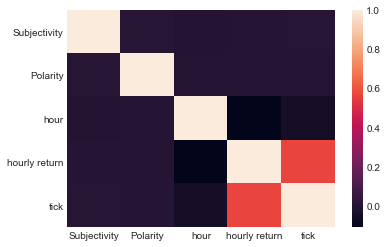

In [17]:
import seaborn as sns
sns.heatmap(df_corr)